(266, 474)

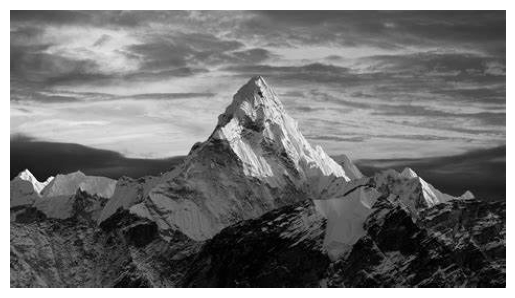

In [21]:
import cv2 as c 
import matplotlib.pyplot as plt 
import numpy as np
img=c.imread("moon.jpg")
image=c.cvtColor(img,c.COLOR_BGR2GRAY)
plt.imshow(image,cmap="gray")
plt.axis("off")
image.shape

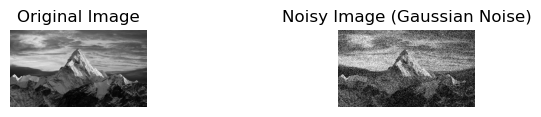

In [23]:
gaussian=np.random.normal(0,55,image.shape)
noisy= image.astype(np.float32) + gaussian 
noisy_image = np.clip(noisy, 0, 255).astype(np.uint8)   
plt.figure(figsize=(6, 4)) 
plt.subplot(1,3, 1) 
plt.imshow(image, cmap='gray') 
plt.title("Original Image") 
plt.axis("off") 
plt.subplot(1, 3, 3) 
plt.imshow(noisy_image, cmap='gray') 
plt.title("Noisy Image (Gaussian Noise)") 
plt.axis("off") 
plt.show()

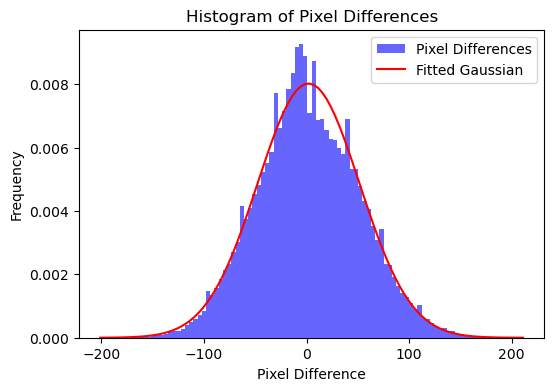

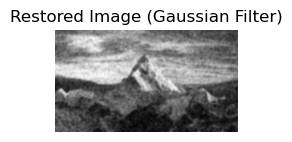

In [25]:
diff = noisy_image.astype(np.float32) - image.astype(np.float32) 
plt.figure(figsize=(6, 4)) 
plt.hist(diff.ravel(), bins=100, density=True, color='blue', alpha=0.6, 
label="Pixel Differences") 
mean, std_dev = np.mean(diff), np.std(diff) 
x = np.linspace(diff.min(), diff.max(), 100) 
gaussian_curve = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) 
/ (2 * std_dev ** 2)) 
plt.plot(x, gaussian_curve, color='red', label="Fitted Gaussian") 
plt.xlabel("Pixel Difference") 
plt.ylabel("Frequency") 
plt.legend() 
plt.title("Histogram of Pixel Differences") 
plt.show() 
plt.figure(figsize=(8, 5)) 
sigma = 2  
from scipy.ndimage import gaussian_filter
restored_image = gaussian_filter(noisy_image, sigma=sigma) 
plt.subplot(1, 3, 3) 
plt.imshow(restored_image, cmap='gray') 
plt.title("Restored Image (Gaussian Filter)") 
plt.axis("off") 
plt.show() 

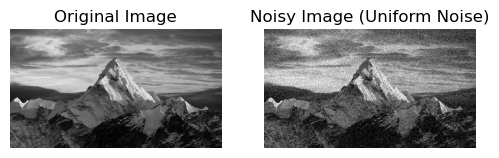

In [27]:
std_dev = 45  
uniform_noise = np.random.uniform(-std_dev, std_dev, image.shape) 
noisy_image = image.astype(np.float32) + uniform_noise 
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8) 
plt.figure(figsize=(6, 4)) 
plt.subplot(1, 2, 1) 
plt.imshow(image, cmap='gray') 
plt.title("Original Image") 
plt.axis("off") 
plt.subplot(1, 2, 2) 
plt.imshow(noisy_image, cmap='gray') 
plt.title("Noisy Image (Uniform Noise)") 
plt.axis("off") 
plt.show() 

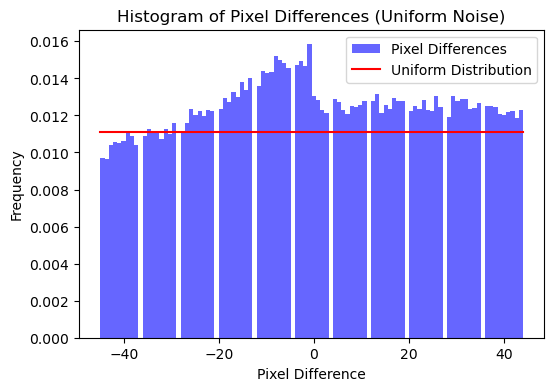

(-0.5, 473.5, 265.5, -0.5)

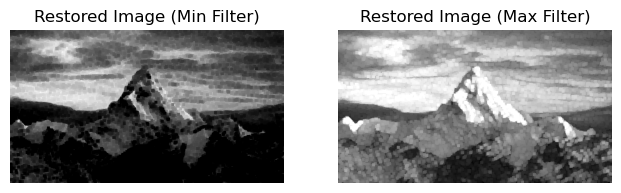

In [29]:
diff = noisy_image.astype(np.float32) - image.astype(np.float32) 
plt.figure(figsize=(6, 4)) 
plt.hist(diff.ravel(), bins=100, density=True, color='blue', alpha=0.6, 
label="Pixel Differences") 
x = np.linspace(diff.min(), diff.max(), 100) 
uniform_curve = np.ones_like(x) / (2 * std_dev)   
plt.plot(x, uniform_curve, color='red', label="Uniform Distribution") 
plt.xlabel("Pixel Difference") 
plt.ylabel("Frequency") 
plt.legend() 
plt.title("Histogram of Pixel Differences (Uniform Noise)") 
plt.show() 
size = 5   
min_filter_image = c.erode(noisy_image, np.ones((size, 
size), np.uint8)) 
max_filter_image = c.dilate(noisy_image, np.ones((size, 
size), np.uint8)) 
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 3, 1) 
plt.imshow(min_filter_image, cmap='gray') 
plt.title("Restored Image (Min Filter)") 
plt.axis("off") 
plt.subplot(1, 3, 2) 
plt.imshow(max_filter_image, cmap='gray') 
plt.title("Restored Image (Max Filter)") 
plt.axis("off") 

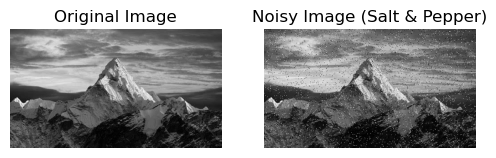

In [31]:
salt_prob = 0.02   
pepper_prob = 0.02   
noisy = np.copy(image) 
salt_mask = np.random.rand(*image.shape) < salt_prob 
noisy[salt_mask] = 255 
pepper_mask = np.random.rand(*image.shape) < pepper_prob 
noisy[pepper_mask] = 0 
plt.figure(figsize=(6, 4)) 
plt.subplot(1, 2, 1) 
plt.imshow(image, cmap='gray') 
plt.title("Original Image") 
plt.axis("off") 
plt.subplot(1, 2, 2) 
plt.imshow(noisy, cmap='gray') 
plt.title("Noisy Image (Salt & Pepper)") 
plt.axis("off") 
plt.show()

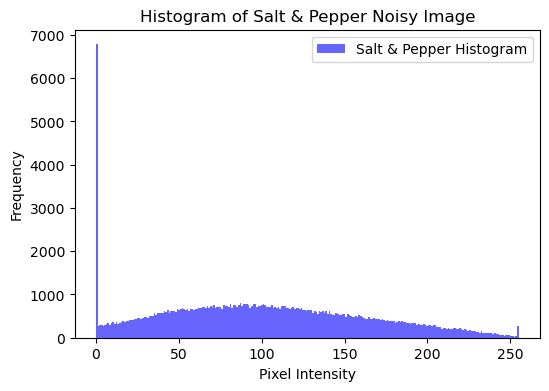

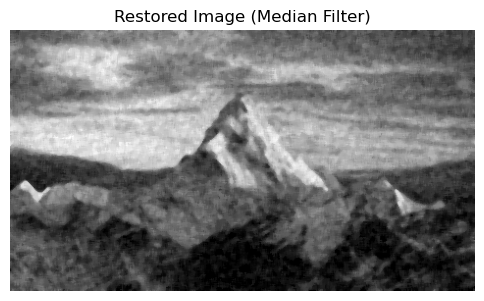

In [33]:
plt.figure(figsize=(6, 4)) 
plt.hist(noisy_image.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.6, 
label="Salt & Pepper Histogram") 
plt.xlabel("Pixel Intensity") 
plt.ylabel("Frequency") 
plt.legend() 
plt.title("Histogram of Salt & Pepper Noisy Image") 
plt.show() 
kernel_size = 5   
median_filtered_image = c.medianBlur(noisy_image, kernel_size) 
plt.figure(figsize=(6, 4)) 
plt.imshow(median_filtered_image, cmap='gray') 
plt.title("Restored Image (Median Filter)") 
plt.axis("off") 
plt.show() 

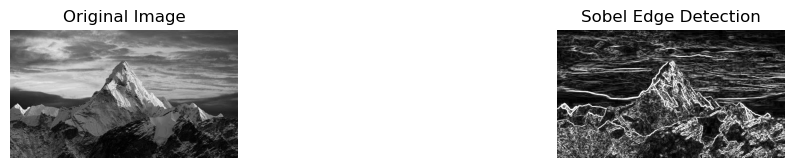

In [35]:
sobel_x = c.Sobel(image, c.CV_64F, 1, 0, ksize=3)   
sobel_y = c.Sobel(image, c.CV_64F, 0, 1, ksize=3)   
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2) 
sobel_magnitude = np.clip(sobel_magnitude, 0, 255).astype(np.uint8)   
plt.figure(figsize=(10, 4)) 
plt.subplot(1, 3, 1) 
plt.imshow(image, cmap='gray') 
plt.title("Original Image") 
plt.axis("off") 
plt.subplot(1,3,3) 
plt.imshow(sobel_magnitude, cmap='gray') 
plt.title("Sobel Edge Detection") 
plt.axis("off") 
plt.show() 

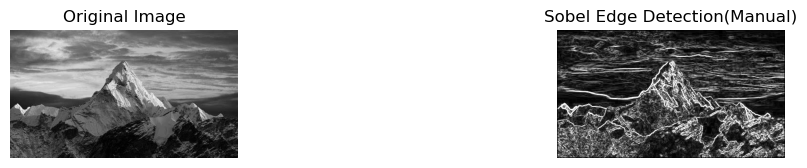

In [37]:
sobel_x= np.array([[-1, 0, 1],  
                            [-2, 0, 2],  
                            [-1, 0, 1]], dtype=np.float32) 
sobel_y= np.array([[-1, -2, -1],  
                            [ 0,  0,  0],  
                            [ 1,  2,  1]], dtype=np.float32) 
height, width = image.shape 
x = np.zeros_like(image, dtype=np.float32) 
y = np.zeros_like(image, dtype=np.float32) 
for i in range(1, height - 1): 
    for j in range(1, width - 1): 
         
        region = image[i-1:i+2, j-1:j+2] 
        gx = np.sum(region * sobel_x) 
        gy = np.sum(region * sobel_y) 
         
         
        x[i, j] = gx 
        y[i, j] = gy 
sobel_magnitude = np.sqrt(x**2 + y**2) 
sobel_magnitude = np.clip(sobel_magnitude, 0, 255).astype(np.uint8)  
plt.figure(figsize=(10, 4)) 
plt.subplot(1, 3, 1) 
plt.imshow(image, cmap='gray') 
plt.title("Original Image") 
plt.axis("off") 
plt.subplot(1,3,3) 
plt.imshow(sobel_magnitude, cmap='gray') 
plt.title("Sobel Edge Detection(Manual)") 
plt.axis("off") 
plt.show() 